In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
              5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301, 6.4296,
              7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176,
              22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836,
              6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,11.7,
              5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102,
              9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994,
              20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274,
              5.1077, 5.7292, 5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204,
              5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])
y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
              3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
              5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692,
              24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164, 3.3928, 10.117,
              5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043,
              1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233, -1.4211, 2.4756, 4.6042, 3.9624,
              5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173,
              20.992, 6.6799, 4.0259,1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526,
              2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
              0.152, 2.8214,1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)  # Количество примеров
    X_b = np.c_[np.ones((m, 1)), X]  # Добавление столбца единиц для свободного члена
    theta = np.zeros(X_b.shape[1])  # Инициализация параметров модели

    for _ in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

In [ ]:
x = x.reshape(-1, 1)

theta = gradient_descent(x, y, learning_rate=0.01, n_iterations=1000)
X_b = np.c_[np.ones((x.shape[0], 1)), x]
y_pred = X_b.dot(theta)

In [ ]:
print("Коэффициенты модели (theta):", theta)

Коэффициенты модели (theta): [-3.78841926  1.18224801]


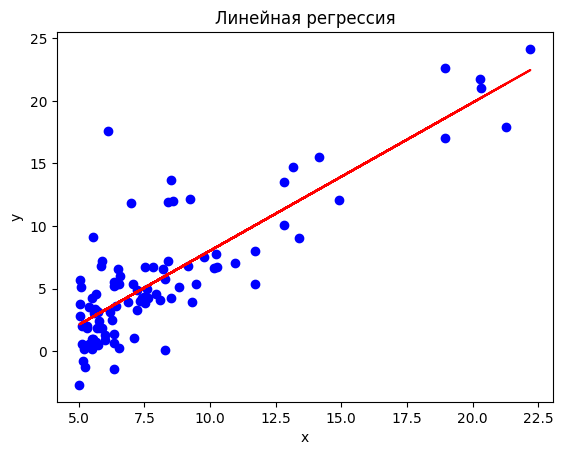

In [ ]:
plt.scatter(x, y, color="blue")
plt.plot(x, y_pred, color="red")
plt.title('Линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
def analytical_solution(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

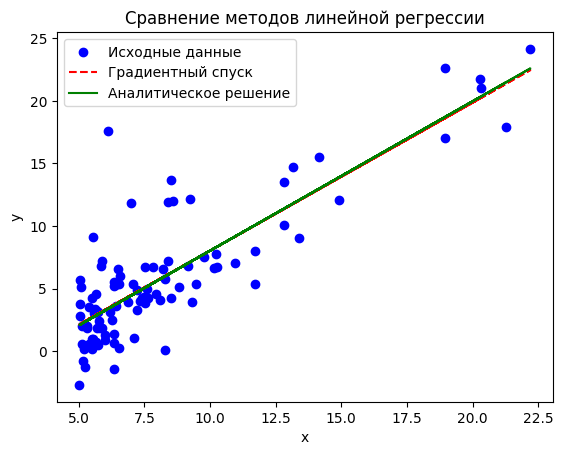

Коэффициенты модели (градиентный спуск): [-3.78841926  1.18224801]
Коэффициенты модели (аналитическое решение): [-3.89578088  1.19303364]


In [ ]:
theta_gd = gradient_descent(x, y, learning_rate=0.01, n_iterations=1000)

# Вычисление аналитического решения
theta_analytic = analytical_solution(x, y)

# Подготовка данных для предсказаний
X_b = np.c_[np.ones((x.shape[0], 1)), x]
y_pred_gd = X_b.dot(theta_gd)
y_pred_analytic = X_b.dot(theta_analytic)

# Визуализация результатов
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x, y_pred_gd, color="red", linestyle='--', label="Градиентный спуск")
plt.plot(x, y_pred_analytic, color="green", linestyle='-', label="Аналитическое решение")
plt.title('Сравнение методов линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Печать найденных коэффициентов
print("Коэффициенты модели (градиентный спуск):", theta_gd)
print("Коэффициенты модели (аналитическое решение):", theta_analytic)

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Оценка модели {model_name}:")
    print(f"  Средняя абсолютная ошибка (MAE): {mae:.2f}")
    print(f"  Среднеквадратичная ошибка (MSE): {mse:.2f}")
    print(f"  Коэффициент детерминации (R²): {r2:.2f}")


In [ ]:
print("Линейная регрессия:")
evaluate_model(y_test, y_pred_lr, "Линейная регрессия")

print("\nLasso-регрессия:")
evaluate_model(y_test, y_pred_lasso, "Lasso-регрессия")

print("\nRidge-регрессия:")
evaluate_model(y_test, y_pred_ridge, "Ridge-регрессия")

Линейная регрессия:
Оценка модели Линейная регрессия:
  Средняя абсолютная ошибка (MAE): 0.53
  Среднеквадратичная ошибка (MSE): 0.56
  Коэффициент детерминации (R²): 0.58

Lasso-регрессия:
Оценка модели Lasso-регрессия:
  Средняя абсолютная ошибка (MAE): 0.58
  Среднеквадратичная ошибка (MSE): 0.61
  Коэффициент детерминации (R²): 0.53

Ridge-регрессия:
Оценка модели Ridge-регрессия:
  Средняя абсолютная ошибка (MAE): 0.53
  Среднеквадратичная ошибка (MSE): 0.56
  Коэффициент детерминации (R²): 0.58


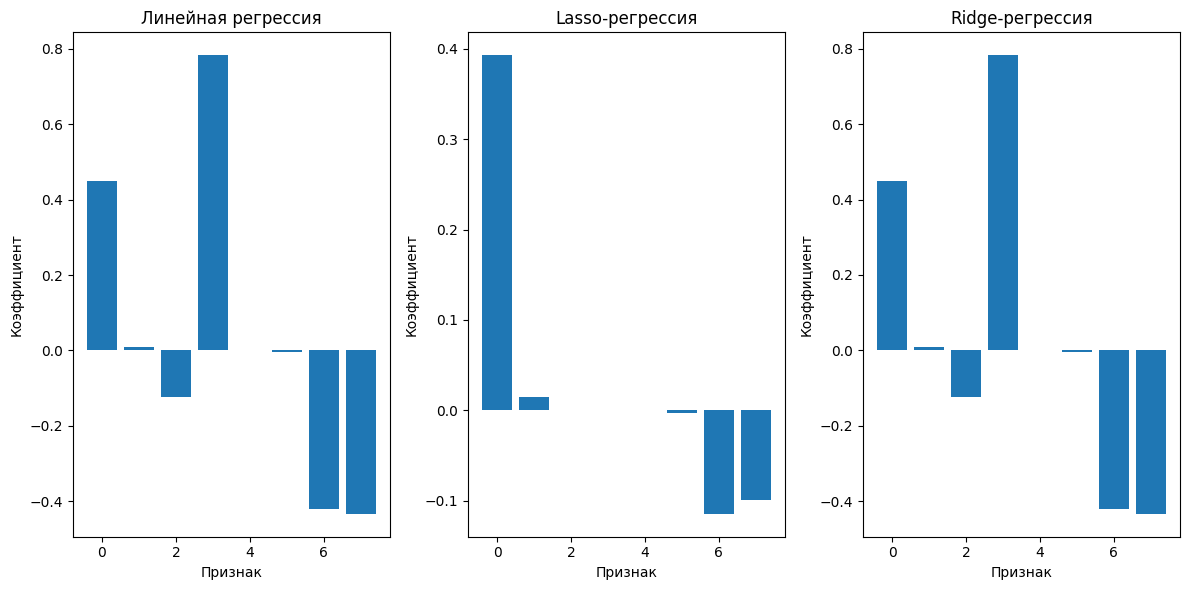

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(np.arange(len(lr.coef_)), lr.coef_)
plt.title("Линейная регрессия")
plt.xlabel("Признак")
plt.ylabel("Коэффициент")

plt.subplot(1, 3, 2)
plt.bar(np.arange(len(lasso.coef_)), lasso.coef_)
plt.title("Lasso-регрессия")
plt.xlabel("Признак")
plt.ylabel("Коэффициент")

plt.subplot(1, 3, 3)
plt.bar(np.arange(len(ridge.coef_)), ridge.coef_)
plt.title("Ridge-регрессия")
plt.xlabel("Признак")
plt.ylabel("Коэффициент")

plt.tight_layout()
plt.show()